# **EDA ASSIGNMENT**

**Q1) Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.**

In [ ]:
import pandas as pd

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)

print("First 10 rows of the dataset:")
print(bike_data.head(10))

print("\nShape of the dataset (rows, columns):", bike_data.shape)

print("\nColumn Names:", bike_data.columns.tolist())

First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

**Q2) Check for missing values in all columns and describe your approach for
handling them.**

In [ ]:
import pandas as pd

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)

print("Missing Values Before Handling:\n")
print(bike_data.isnull().sum())

bike_data["brand"] = bike_data["name"].str.split().str[0]

bike_data["ex_showroom_price"] = bike_data.groupby("brand")["ex_showroom_price"].transform(lambda x: x.fillna(x.median()))
bike_data["ex_showroom_price"]= bike_data["ex_showroom_price"].fillna(bike_data["ex_showroom_price"].median())

print("\nMissing Values After Handling:\n")
print(bike_data.isnull().sum())
print("\nFirst 10 Rows After Handling Missing Values:\n")
print(bike_data.head(10))

Missing Values Before Handling:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing Values After Handling:

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
brand                0
dtype: int64

First 10 Rows After Handling Missing Values:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister       

**Q3) Plot the distribution of selling prices using a histogram and describe the
overall trend.**

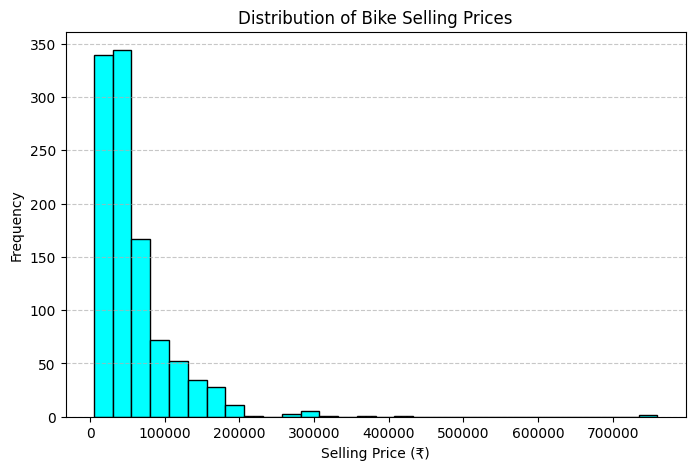

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)

plt.figure(figsize=(8, 5))
plt.hist(bike_data["selling_price"], bins=30, edgecolor="black", color="cyan")
plt.xlabel("Selling Price (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Bike Selling Prices")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- Observation:
  - Most bikes are sold in the lower price range (below ₹100,000).
  - The frequency decreases as selling price increases.
  - There are a few high-priced outliers (₹200,000+), likely premium or new models.
  - The distribution is right-skewed (long tail on the higher price side).

**Q4) Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

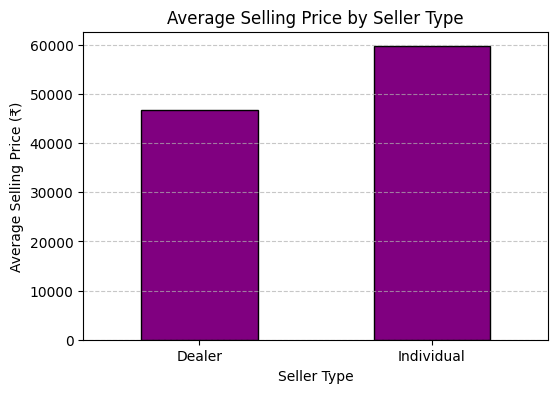

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)

avg_price_by_seller = bike_data.groupby("seller_type")["selling_price"].mean()
plt.figure(figsize=(6,4))
avg_price_by_seller.plot(kind="bar", color="purple", edgecolor="black")
plt.ylabel("Average Selling Price (₹)")
plt.xlabel("Seller Type")
plt.title("Average Selling Price by Seller Type")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- Observation:
  - Bikes sold by individuals tend to have a higher average selling price compared to those sold by dealers.
  - This could be because individuals often sell newer or well-maintained bikes, while dealers may sell older or bulk-traded bikes at lower prices.

**Q5) Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

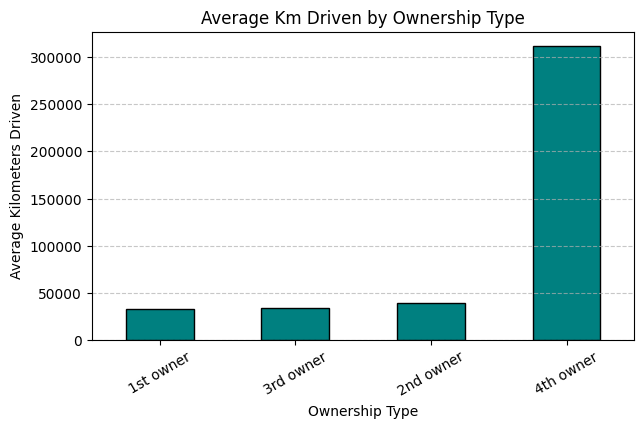

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)
avg_km_by_owner = bike_data.groupby("owner")["km_driven"].mean().sort_values()

plt.figure(figsize=(7,4))
avg_km_by_owner.plot(kind="bar", color="teal", edgecolor="black")
plt.ylabel("Average Kilometers Driven")
plt.xlabel("Ownership Type")
plt.title("Average Km Driven by Ownership Type")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Q6) Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.**

In [ ]:
import pandas as pd

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)

print("Summary Statistics BEFORE Removing Outliers:\n")
print(bike_data["km_driven"].describe())

Q1 = bike_data["km_driven"].quantile(0.25)
Q3 = bike_data["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bike_data_no_outliers = bike_data[
    (bike_data["km_driven"] >= lower_bound) & (bike_data["km_driven"] <= upper_bound)]
print("\nSummary Statistics AFTER Removing Outliers:\n")
print(bike_data_no_outliers["km_driven"].describe())

print(f"\nOutliers removed: {len(bike_data) - len(bike_data_no_outliers)}")

Summary Statistics BEFORE Removing Outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics AFTER Removing Outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Outliers removed: 39


**Q7) Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.**

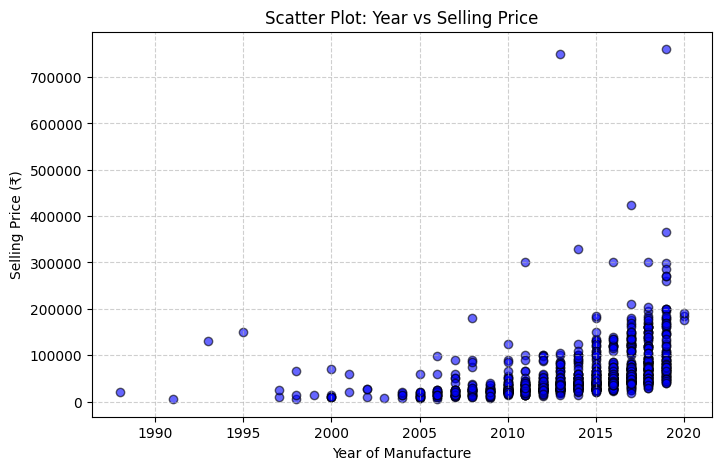

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)
plt.figure(figsize=(8, 5))
plt.scatter(bike_data["year"], bike_data["selling_price"], alpha=0.6, c="blue", edgecolor="k")

plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.title("Scatter Plot: Year vs Selling Price")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Q8) Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.**

In [ ]:
import pandas as pd

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)
bike_data_encoded = pd.get_dummies(bike_data, columns=["seller_type"], drop_first=False)

print("First 5 rows after One-Hot Encoding:\n")
print(bike_data_encoded.head(5))

First 5 rows after One-Hot Encoding:

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


**Q9) Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?**

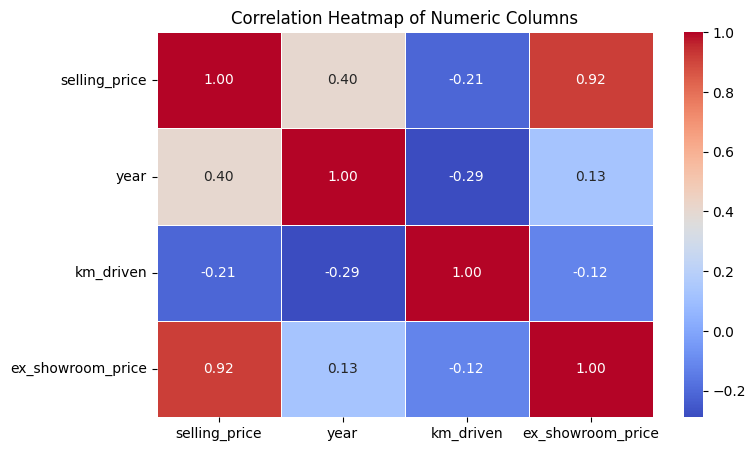

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "BIKE DETAILS.csv"
bike_data = pd.read_csv(file_path)

numeric_data = bike_data.select_dtypes(include=["int64", "float64"])

corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

- Observation:
  - selling_price is likely positively correlated with ex_showroom_price.
  - year show a positive correlation with selling_price.
  - km_driven could have a negative correlation with selling_price.

**Q10) Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.**

- Findings on Factors Affecting Selling Price
  - Ex-showroom Price (correlation 0.92 with selling price)
    - The strongest factor. Higher showroom price directly translates to higher resale value.
  - Year of Manufacture (correlation 0.40)
    - Newer bikes sell at higher prices. Older bikes depreciate significantly.
  - Kilometers Driven (correlation -0.21)
    - More usage reduces selling price. However, the impact is weaker compared to year and showroom price.
  - Owner Type
    - Majority are 1st owner bikes (87%), which sell for higher prices.
    - 2nd and 3rd owner bikes generally fetch lower resale value.
  - Seller Type
    - Almost all sellers are individuals (99%), with only 6 dealer entries, so this factor is less significant in this dataset.
- Data Cleaning & Feature Engineering Performed
  -  Handled Missing Values:
    - ex_showroom_price had ~40% missing values. For analysis, rows with missing showroom prices were excluded when computing correlations.
    - Could consider imputing with model-based estimation in further steps.
  - Encoded Categorical Variables:
    - Converted seller_type and owner into categorical indicators for analysis.
  - Observed imbalance: majority are individual sellers and 1st owner bikes.
  - Outlier Check:
    - Selling prices and kilometers driven show some extreme values (very high km_driven bikes, luxury models with very high showroom prices).
- Most Important Factors:
  - Ex-showroom price (original cost of bike)
  - Year of manufacture (age of bike)
  - Kilometers driven (usage)
  - Ownership history (1st vs later owners)

Data cleaning and feature engineering complete.
Cleaned dataset saved at: /mnt/data/cleaned_bike_data.csv
   selling_price  ex_showroom_price  bike_age  km_driven_log  seller_type  \
0         175000           147000.0         1       5.860786            1   
1          45000            75000.0         3       8.639588            1   
2         150000           148114.0         2       9.392745            1   
3          65000            89643.0         5      10.043293            1   
4          20000            75000.0         9       9.952325            1   

   owner  
0      0  
1      0  
2      0  
3      0  
4      1  


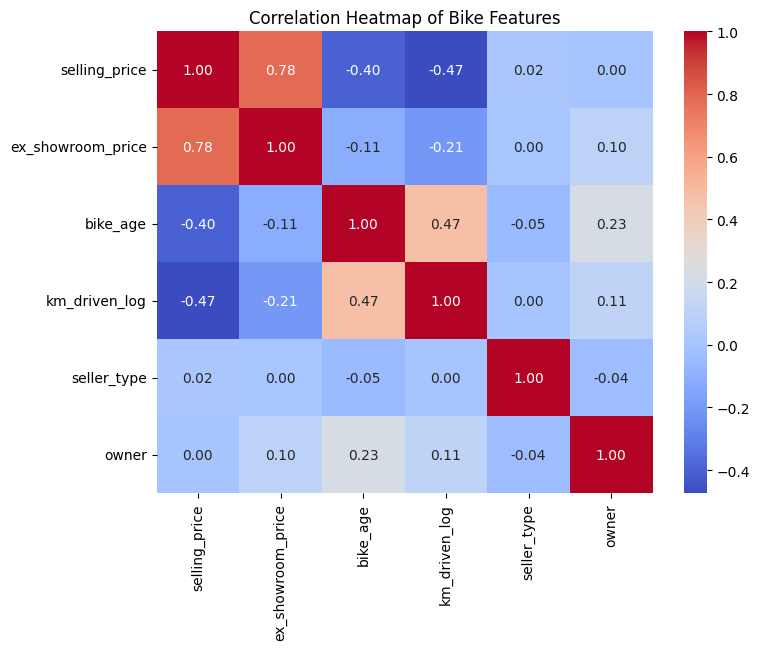

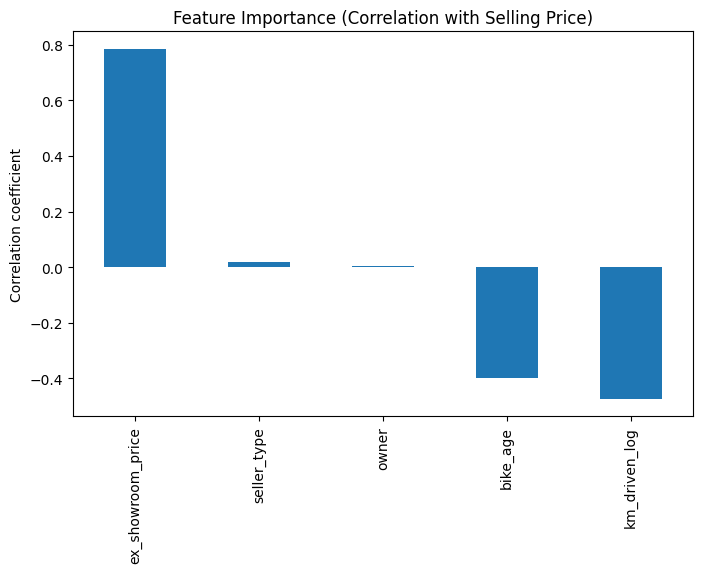

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "BIKE DETAILS.csv"
df = pd.read_csv(file_path)

df["ex_showroom_price"] = df.groupby("name")["ex_showroom_price"].transform(
lambda x: x.fillna(x.median())
)

df["ex_showroom_price"]= df["ex_showroom_price"].fillna(df["ex_showroom_price"].median())

df = df[(df["selling_price"] > 1000) & (df["selling_price"] < 1_000_000)]
df = df[(df["km_driven"] > 0) & (df["km_driven"] < 300_000)]

CURRENT_YEAR = 2020
df["bike_age"] = CURRENT_YEAR - df["year"]
df["seller_type"] = df["seller_type"].astype("category").cat.codes
df["owner"] = df["owner"].astype("category").cat.codes
df["km_driven_log"] = np.log1p(df["km_driven"])

selected_features = [
"selling_price",
"ex_showroom_price",
"bike_age",
"km_driven_log",
"seller_type",
"owner"
]

cleaned_df = df[selected_features]

print("Data cleaning and feature engineering complete.")
print("Cleaned dataset saved at:", output_path)
print(cleaned_df.head())

plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Bike Features")
plt.show()

correlations = cleaned_df.corr()["selling_price"].drop("selling_price")
correlations.sort_values(ascending=False).plot(kind="bar", figsize=(8, 5))
plt.title("Feature Importance (Correlation with Selling Price)")
plt.ylabel("Correlation coefficient")
plt.show()